# Section 6 Initial Model Training

## kNN Model
kNN makes predictions based on its similarity to its neighbors or datapoints. We're using this model because:
* kNN is easier to implement compared to the rest of the models. We would like to see how a simpler model fares against more complex models. It can serve as a baseline.
* Our target variable has multiple categories. It may be naive but it works well for multiclass classification due to the majority vote.

It's important to note the following about kNN:
* It may struggle in highly-dimensional datasets and large datasets.
* After cleaning the dataset, there are notable imbalances according to the YData-Profiling Report. kNN may not be as accurate.

Hyperparameters for kNN:
* the primary hyperparameter for kNN is `k`, which is the number of neighbors to consider when making predictions. A smaller `k` can lead to overfitting, while a larger `k` can smooth out the decision boundary.
* the second is the `distance metric`. by default, kNN uses Euclidean distance, but other metrics like Manhattan or Minkowski can be used. (this is tested later on)

### Pre-requisites 
<span style="background-color:red">CHECK FOR DUPLICATES</span>

In [23]:
# necessary imports
import random
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

# loading
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# for model
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import cross_val_predict, cross_val_score # don't need this, GridSearch performs it internally
from sklearn.preprocessing import LabelEncoder

# section 7 error analysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


# setup code taken from STINTSY class notebook
# Makes matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline

plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the Dataset
Then, we'll load the exported dataset into the environment.

In [24]:
# load dataset into the environment
file_dir = './cleaned_df.csv'

def load_dataset(filename):
    df = pd.read_csv('cleaned_df.csv') # read
    knn_df = df.copy() # make a copy
    return knn_df

knn_df = load_dataset(file_dir)
# knn_df.head(10)

### Encoding into Numerical Values (Preprocessing)
kNN requires numerical values for the features and target variable. We will encode the categorical variables into numerical values. This is done using the `LabelEncoder` class from the `sklearn.preprocessing` module. The `LabelEncoder` class is used to convert categorical labels into numerical values. It assigns a unique integer to each category in the dataset. We do this for everything but our target variable.

In [25]:
# knn expects everything to be in numerical format
# label encode everything that is binary categorical and categorical
label_encoder = LabelEncoder()

categ_cols = [
    col for col in knn_df.columns 
        # dont encode the target variable
        if knn_df[col].dtype in ['object', 'category', 'string'] and col != 'PUFC14_PROCC'
]

for col in categ_cols:
    knn_df[col] = label_encoder.fit_transform(knn_df[col])

print("Binary categorical columns encoded:", categ_cols)

Binary categorical columns encoded: ['PUFREG', 'PUFURB2K10', 'PUFC03_REL', 'PUFC04_SEX', 'PUFC06_MSTAT', 'PUFC07_GRADE', 'PUFC08_CURSCH', 'PUFC09_GRADTECH', 'PUFC10_CONWR', 'PUFC11_WORK', 'PUFC12_JOB', 'PUFC16_PKB', 'PUFC17_NATEM', 'PUFC20_PWMORE', 'PUFC21_PLADDW', 'PUFC22_PFWRK', 'PUFC23_PCLASS', 'PUFC24_PBASIS', 'PUFC26_OJOB', 'PUFC29_WWM48H', 'PUFC41_WQTR', 'PUFC43_QKB', 'PUFC16_PKB_GENERAL']


### Splitting the Dataset into Training and Testing Sets
We will split the dataset into training and testing sets. The training set will be used to train the model, while the testing set will be used to evaluate its performance. We will use the `train_test_split` function from the `sklearn.model_selection` module to split the dataset. The function takes the features and target variable as input and returns the training and testing sets.

We set X to the set of of all feature columns and y to the column containing the target variable. Then we'll use `train_test_split` to split the dataset into training and test sets. The test size is set to 0.2, meaning that 20% of the data will be used for testing and 80% for training. The random state is set to 42 to ensure reproducibility. Finally, we stratify according to the target variable.

In [26]:
X = knn_df.drop(columns=['PUFC14_PROCC'])  # drop whatever column is assigned to y
y = knn_df['PUFC14_PROCC']

# we stratify/shuffle the data according to the target variable
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

Let's select our features and our target. Let's also view the shape so that we can tell if the data was prepared correctly.

In [27]:
print('Training data shape: ', knn_X_train.shape)
print('Training labels shape: ', knn_y_train.shape)

print('Test data shape: ', knn_X_test.shape)
print('Test labels shape: ', knn_y_test.shape)

Training data shape:  (56968, 29)
Training labels shape:  (56968,)
Test data shape:  (14242, 29)
Test labels shape:  (14242,)


### Instantiating the Model and Initial Training
We will use the `KNeighborsClassifier` class from the `sklearn.neighbors` module to create the kNN model. The class takes several parameters, including the number of neighbors to consider (k) and the distance metric to use. 

We will set k to 5 arbitrarily and use the default distance metric (Euclidean distance).

In this case:
* `hyperparameter k` (neighbors) = 5
* `algorithm`: kd_tree
* `metric`: Euclidean distance (L2-distance)

In [28]:
n_neighbors = 5 

knn_model = KNeighborsClassifier(n_neighbors, algorithm='auto', metric='euclidean')

knn_model.fit(knn_X_train, knn_y_train) # training the model

knn_y_predicted = knn_model.predict(knn_X_test)

In [29]:
knn_accuracy = accuracy_score(knn_y_test, knn_y_predicted) # from sklearn
print(f"{round(knn_accuracy * 100, 3)}% accuracy")
knn_classification_report = classification_report(knn_y_test, knn_y_predicted)
print(knn_classification_report)

61.003% accuracy
                                                    precision    recall  f1-score   support

                          Armed Forces Occupations       0.11      0.14      0.12        14
                          Clerical Support Workers       0.40      0.48      0.44       619
                  Craft and Related Trades Workers       0.42      0.42      0.42       861
                            Elementary Occupations       0.67      0.67      0.67      4365
                                          Managers       0.55      0.51      0.53      1064
        Plant and Machine Operators and Assemblers       0.47      0.48      0.47       432
                                     Professionals       0.65      0.73      0.69      2037
                         Service and Sales Workers       0.51      0.40      0.45      1904
Skilled Agricultural, Forestry and Fishery Workers       0.74      0.85      0.79      2393
           Technicians and Associate Professionals       0.26 

**Observations**: Without any feature selection, our model has a 61% accuracy score.

# Section 7 Error Analysis

## kNN Analysis
Let's get a recap of the results of the intial training:

In [30]:
print(knn_classification_report)

                                                    precision    recall  f1-score   support

                          Armed Forces Occupations       0.11      0.14      0.12        14
                          Clerical Support Workers       0.40      0.48      0.44       619
                  Craft and Related Trades Workers       0.42      0.42      0.42       861
                            Elementary Occupations       0.67      0.67      0.67      4365
                                          Managers       0.55      0.51      0.53      1064
        Plant and Machine Operators and Assemblers       0.47      0.48      0.47       432
                                     Professionals       0.65      0.73      0.69      2037
                         Service and Sales Workers       0.51      0.40      0.45      1904
Skilled Agricultural, Forestry and Fishery Workers       0.74      0.85      0.79      2393
           Technicians and Associate Professionals       0.26      0.10      0.

| Model     | Scaling Method | K-neighbors      | Algorithm | Metric | Accuracy | 
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Initial Model | None | 5 | kd_tree | Euclidean | 61.00% |

We will use this table again later when comparing.

**Observations:** Our initial model training shows that the model had an accuracy score of `65.27%`. It appears to be **underfitting**.
* Precision, F1-score, and recall are all low for `Armed Forces Occupations` and `Technicians and Associate Professionals`. It's struggling to capture the patterns in the data for these classes.
* The macro average F1-score is `0.47`, which indicates that the model is not performing well overall for all classes, especially those that are underrepresented. 
* The weighted average F1-score is `0.60`, this is close to the accuracy of `60.996%` (61%). This indicates that the model is performing better on the majority classes than on the minority classes.
* By looking at the support column, There's a high class imbalance. For example, `Armed Forces Occupations` has a support of 16 samples while `Elementary Occupations` has 4317 samples.

Furthermore, these are the top 3 classes that the model is having a hard time classifying:
| Class Name                     | Precision | Recall | F1-Score | Support |
| ------------------------------ | --------- | ------ | -------- | ------- |
| Armed Forces Occupations | 0.11 |     0.14 |      0.12 |        14 |
| Technicians and Associate Professionals |       0.26 |      0.10 |      0.15 |       553 |

Let's validate this using a confusion matrix:

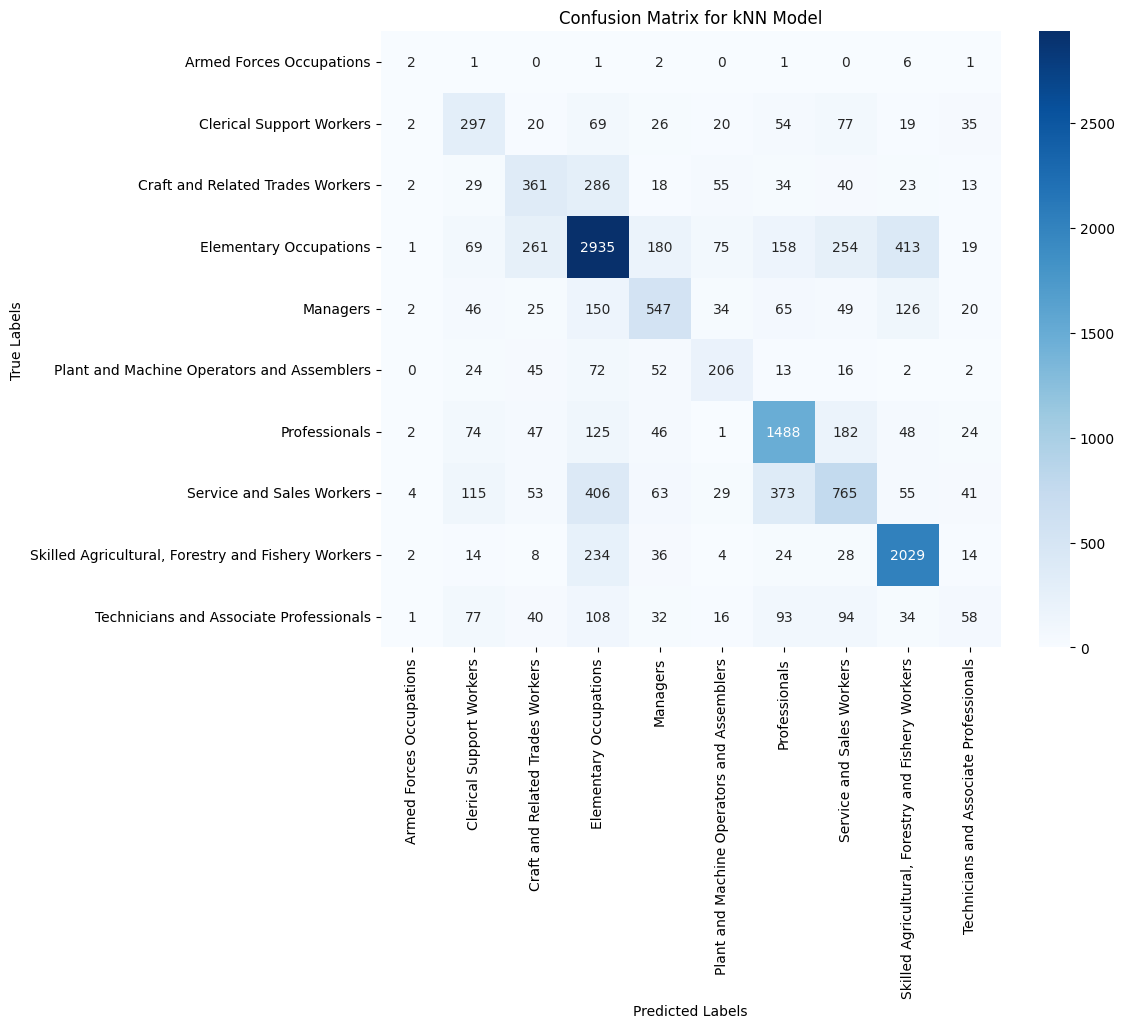

In [31]:
knn_cm = confusion_matrix(knn_y_test, knn_y_predicted, labels=knn_model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for kNN Model')
plt.show()

**Observations:** The diagonal cells of the confusion matrix represent the number of correct predictions for each class, while off-diagonal cells represent misclassifications. 

In the off-diagonal cells that are darker, we can see that:
| Num Misclassified | True Class | Predicted | Highest to Lowest |
| ---------- | ---------- | ----------| ----------|
| 69 | Clerical Support Workers | Elementary Occupations | 12 |
| 288 | Craft and Related Trade Workers | Elementary Occupations | 5 |
| 261 | Elementary Occupations | Craft and Related Trade Workers | 6 |
| 182 | Elementary Occupations | Managers | 8 |
| 416 | Elementary Occupations | Skilled Agricultural, Forestry, and Fishery Workers | 1 |
| 126 | Managers | Skilled Agricultural, Forestry, and Fishery Workers | 9 |
| 72 | Plant and Machine Operators and Assemblers | Elementary Occupations | 11 |
| 183 | Professionals | Service and Sales Workers | 7 |
| 406 | Service and Sales Workers | Elementary Occupations | 2 |
| 374 | Service and Sales Workers | Professionals | 3 |
| 231 | Skilled Agricultural, Forestry, and Fishery Workers | Elementary Occupations | 4 |
| 108 | Technicians and Associate Professionals | Elementary Occupations | 10 |

Given this, the top 5 misclassified are:
* `Elementary Occupations` misclassified as `Skilled Agricultural, Forestry, and Fishery Workers` (416).
* `Service and Sales Workers` misclassified as `Elementary Occupations` (406).
* `Service and Sales Workers` misclassified as `Professionals` (374).
* `Skilled Agricultural, Forestry, and Fishery Workers` misclassified as `Elementary Occupations` (231).
* `Craft and Related Trade Workers` misclassified as `Elementary Occupations` (288).

We should take special note of `Elementary Occupations`, `Service and Sales Workers`, `Skilled Agricultural, Forestry, and Fishery Workers`, as well as `Craft and Related Trade Workers` and `Professionals` to be sure.

In [32]:
knn_class_support = np.sum(knn_cm, axis=1)

# define a threshold for imbalance (e.g., classes with support < 50% of total samples)
knn_total_samples = np.sum(knn_class_support)
knn_imbalance_threshold = 0.5 * knn_total_samples # imbalance threshold is set to 50% of the total samples

knn_imbalanced_classes = [label for label, support in zip(knn_model.classes_, knn_class_support) if support < knn_imbalance_threshold]

print("Class Support:", dict(zip(knn_model.classes_, knn_class_support)))
print(f"Imbalanced Classes (support < {knn_imbalance_threshold}): {knn_imbalanced_classes}")

Class Support: {'Armed Forces Occupations': np.int64(14), 'Clerical Support Workers': np.int64(619), 'Craft and Related Trades Workers': np.int64(861), 'Elementary Occupations': np.int64(4365), 'Managers': np.int64(1064), 'Plant and Machine Operators and Assemblers': np.int64(432), 'Professionals': np.int64(2037), 'Service and Sales Workers': np.int64(1904), 'Skilled Agricultural, Forestry and Fishery Workers': np.int64(2393), 'Technicians and Associate Professionals': np.int64(553)}
Imbalanced Classes (support < 7121.0): ['Armed Forces Occupations', 'Clerical Support Workers', 'Craft and Related Trades Workers', 'Elementary Occupations', 'Managers', 'Plant and Machine Operators and Assemblers', 'Professionals', 'Service and Sales Workers', 'Skilled Agricultural, Forestry and Fishery Workers', 'Technicians and Associate Professionals']


**Observations:** The code shows the following are imbalanced:
* <span style="background-color:orange">Armed Forces Occupations</span>
* Clerical Support Workers
* Craft and Related Trades Workers
* <span style="background-color:red">Elementary Occupations</span>
* Managers 
* Plant and Machine Operators and Assemblers
* Professionals
* <span style="background-color:red">Service and Sales Workers</span>
* <span style="background-color:red">Skilled Agricultural Forestry and Fishery Workers</span>
* <span style="background-color:orange">Technicians and Associate Professionals</span>

Those highlighted in red were the largest misclassifications in the off-diagonal cells.
Those highlighted in orange were the classes with low precision, recall, and f1-score.

To improve the model, we'll handle the imbalance through scaling, conduct a PCA, and implement hyperparameter tuning to find the best value of k.

# Section 8 Improving Model Performance

## Improving kNN
### Cross Validation and Hyperparameter Tuning
Cross Validation is a technique to evaluate the performance of our kNN model. It splits the dataset into k subsets called folds, and trained on k-1 folds. This is done to reduce overfitting in the model. [Source](https://www.statology.org/complete-guide-cross-validation/)

In kNN, we have a hyperparameter k (different from k-folds) which is used to determine how many neighbors are considered. For this example, we will use Grid Search to find the optimal parameters. Grid Search has a fit and score method. [Source](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

We are working with a very large dataset, so we will also be using Principal Component Analysis (PCA) to reduce the dimensionality before putting it through the Grid Search. [Source](https://peerdh.com/blogs/programming-insights/optimizing-k-nearest-neighbors-for-large-datasets-in-scikit-learn) We're only doing this once because doing it multiple times will be very expensive and time consuming.


#### Standardization

Here, we use StandardScaler because kNN is sensitive to the scale of the data. `StandardScaler` standardizes the features by removing the mean and scaling to unit variance, which is important because kNN uses distance metrics to determine the similarity between data points, and if the features are not on the same scale, it can lead to biased results.

Let's see what the feature distribution looks like before scaling.

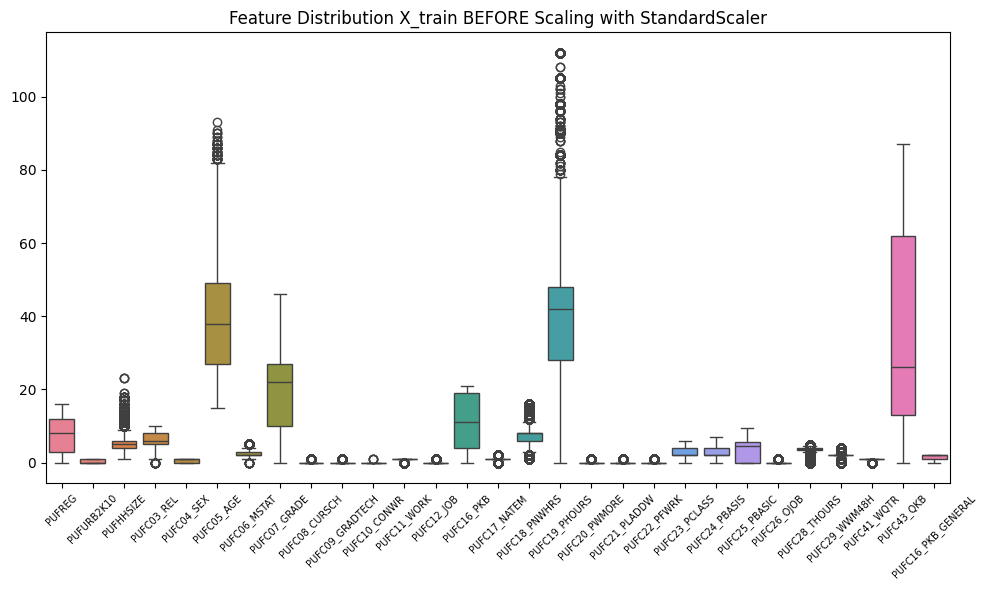

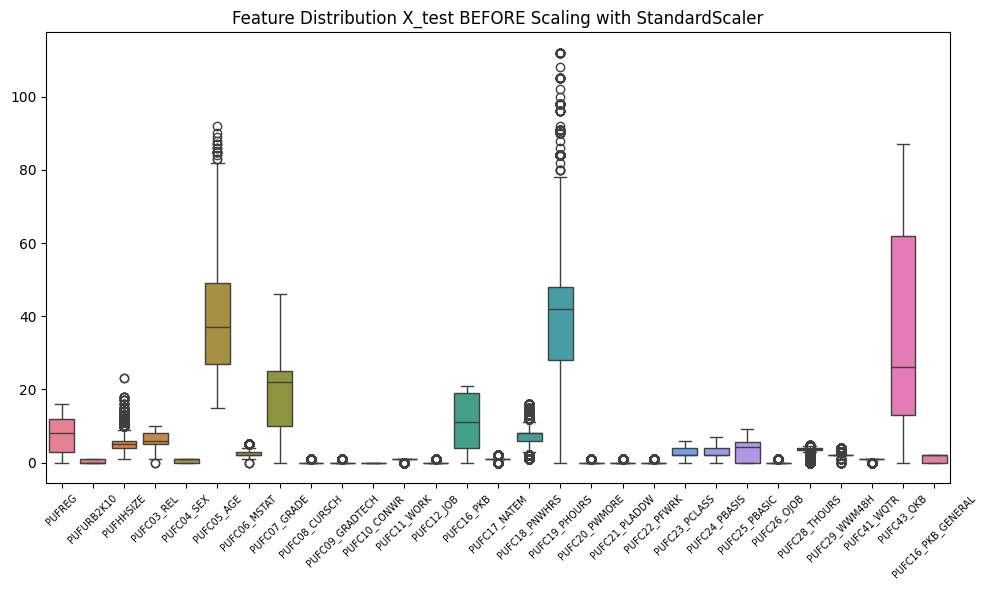

In [33]:
# feature distribution before scaling before PCA
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(knn_X_train))
plt.title('Feature Distribution X_train BEFORE Scaling with StandardScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(knn_X_test))
plt.title('Feature Distribution X_test BEFORE Scaling with StandardScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.show()

The boxplot looks very imbalanced, and they're similar for both X_train and X_test. So let's use `StandardScaler()` and see what that looks like.

In [34]:
stdscaler = StandardScaler()
stdscaler_Xtrain_scaled = stdscaler.fit_transform(knn_X_train)
stdscaler_Xtest_scaled = stdscaler.fit_transform(knn_X_test)

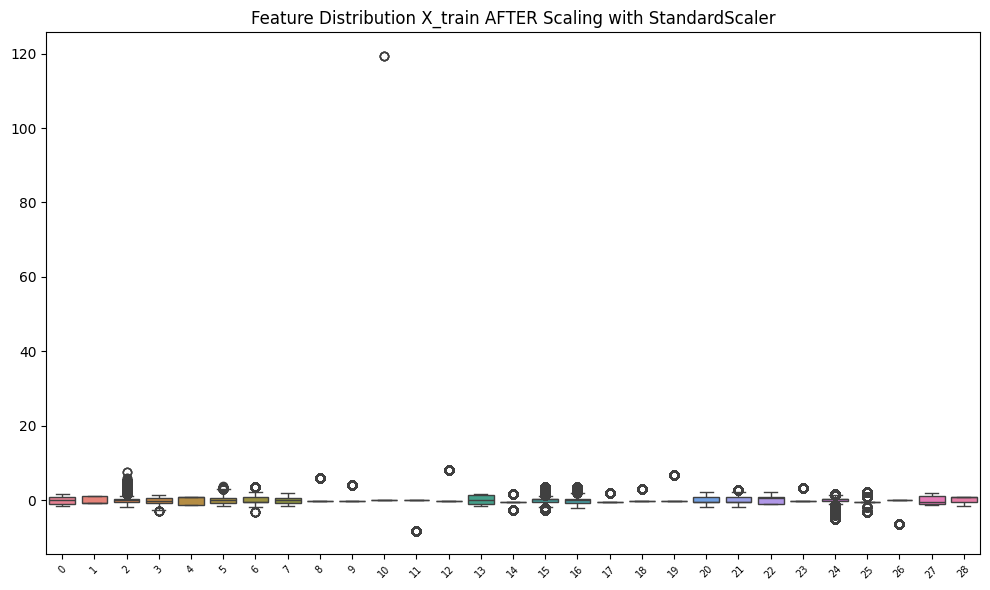

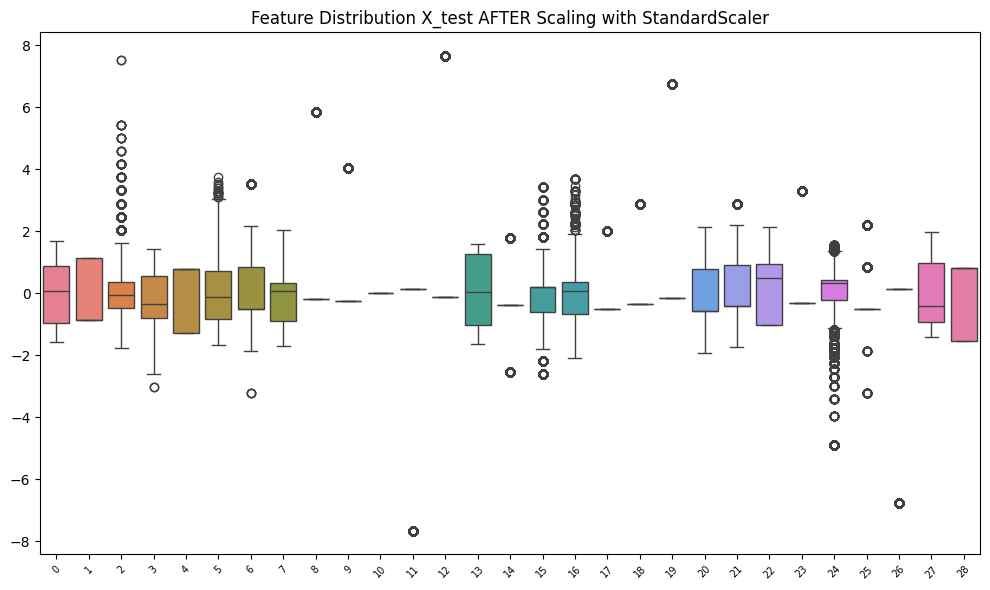

In [35]:
# feature distribution stdscaler before PCA
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(stdscaler_Xtrain_scaled))
plt.title('Feature Distribution X_train AFTER Scaling with StandardScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(stdscaler_Xtest_scaled))
plt.title('Feature Distribution X_test AFTER Scaling with StandardScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.show()

**Observations:** Many features still have outliers and they're all closer to 0 for X_train. Based on experience, the PCA will turn them into nan. Also, the train and test sets look different. X_train has negative values now as well.

Let's try doing it using another scaler, RobustScaler. [Source](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-data-with-outliers) It's more robust to outliers.

In [36]:
rbstscaler = RobustScaler()
rbst_Xtrain_scaled = rbstscaler.fit_transform(knn_X_train)
rbst_Xtest_scaled = rbstscaler.fit_transform(knn_X_test)

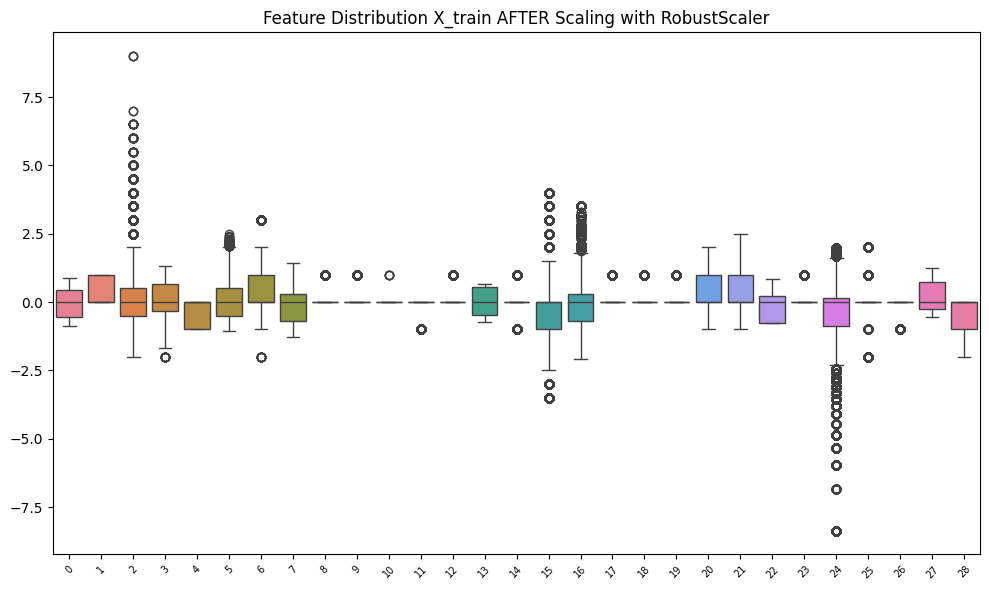

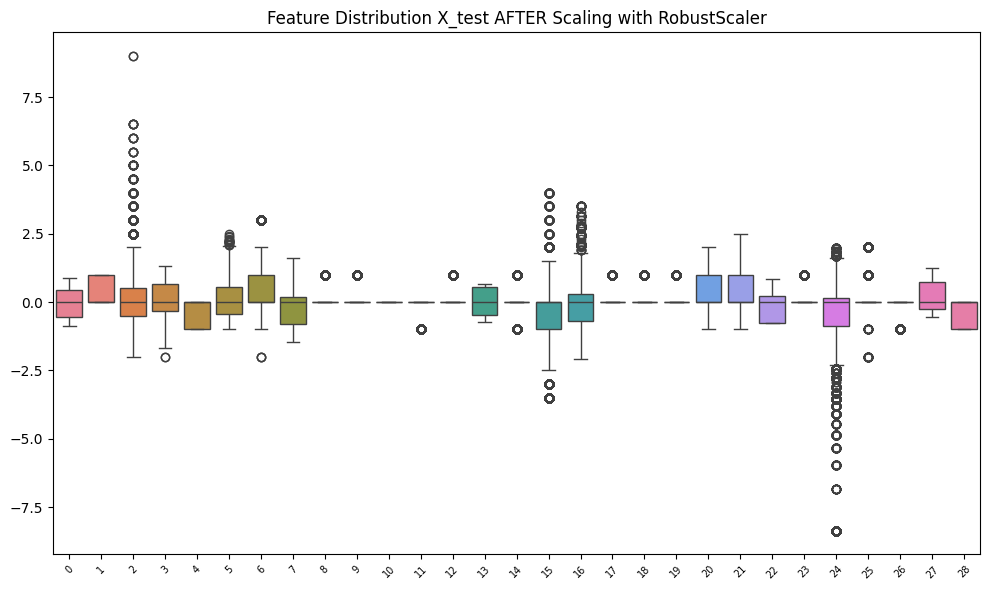

In [37]:
# feature distribution rbstscaler before PCA
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(rbst_Xtrain_scaled))
plt.title('Feature Distribution X_train AFTER Scaling with RobustScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(rbst_Xtest_scaled))
plt.title('Feature Distribution X_test AFTER Scaling with RobustScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.show()

**Observations:** It looks more balanced but now there are negative numbers. Since we're working with real world data, you can't have negative numbers. 

Let's try MinMaxScaler. [Source1](https://stackoverflow.com/questions/55073423/should-i-normalize-or-standardize-my-dataset-for-knn) [Source2](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)

In [38]:
minmaxscaler = MinMaxScaler()
minmax_Xtrain_scaled = minmaxscaler.fit_transform(knn_X_train)
minmax_Xtest_scaled = minmaxscaler.fit_transform(knn_X_test)

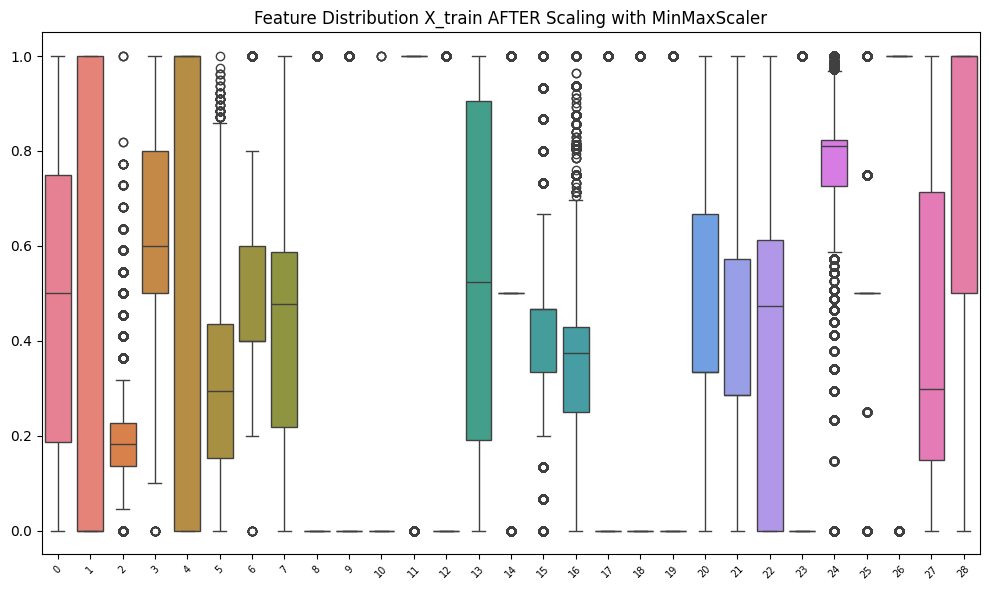

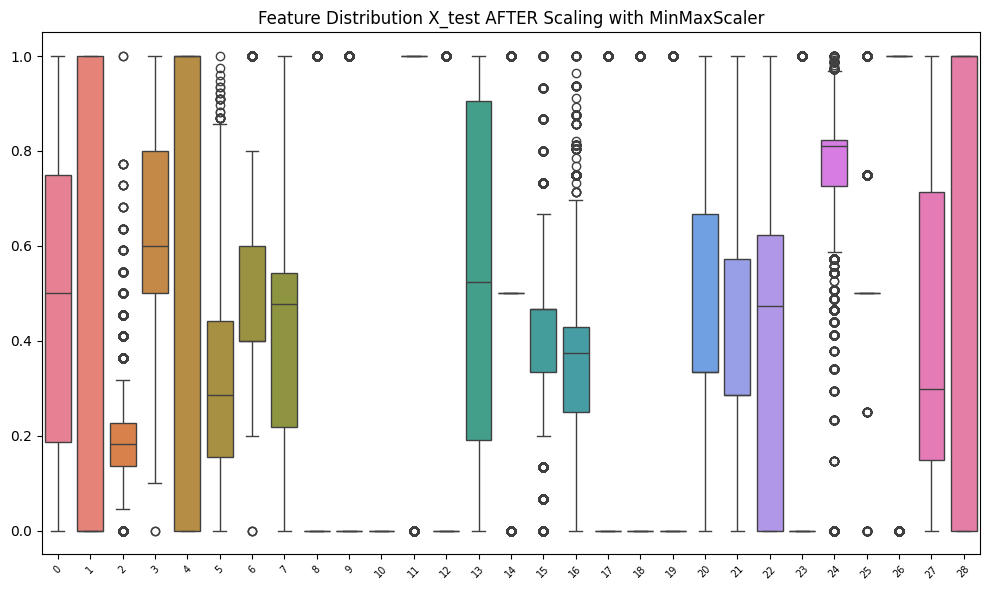

In [39]:
# feature distribution minmaxscaler before PCA
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(minmax_Xtrain_scaled))
plt.title('Feature Distribution X_train AFTER Scaling with MinMaxScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(minmax_Xtest_scaled))
plt.title('Feature Distribution X_test AFTER Scaling with MinMaxScaler')
plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

plt.show()

**Observations:** They both look similar but now are within a range of 0.0 to 1.0.

#### Feature Selection
[Source](https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/)

Here, we will do feature selection before the PCA. This is because PCA will reduce the dimensionality of the data, and therefore it would be good to work with more meaningful ones. This will also save more time and resources before the cross-validation in GridSearch is done. We'll be using SelectKBest. It removes all but the removes all but the
k highest scoring features. k refers to the number of original features to retain based on their scores from a statistical test and selects the top k features that are most relevant to our target variable y.

SelectKBest will have the following parameters
* score_func = f_classif [Source](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

train_scaled = {
    "stdscaler_Xtrain_scaled": stdscaler_Xtrain_scaled,
    "rbst_Xtrain_scaled": rbst_Xtrain_scaled,
    "minmax_Xtrain_scaled": minmax_Xtrain_scaled
}

test_scaled = {
    "stdscaler_Xtest_scaled": stdscaler_Xtest_scaled,
    "rbst_Xtest_scaled": rbst_Xtest_scaled,
    "minmax_Xtest_scaled": minmax_Xtest_scaled
}

fs_k = 10

for name, train in train_scaled.items():
    print(f" --- SelectKBest for {name} ---")

    # initialize SelectKBest with the scoring function and number of features
    selector = SelectKBest(score_func=f_classif, k=fs_k)

    # fit selector on training data
    train_scaled[name] = selector.fit_transform(train, knn_y_train)

    # apply the same transformation to the corresponding test set
    test_name = name.replace("Xtrain", "Xtest")  # Match the test set name
    test_scaled[test_name] = selector.transform(test_scaled[test_name])

    print(f"Selected top {fs_k} features for {name} and {test_name}")

 --- SelectKBest for stdscaler_Xtrain_scaled ---
Selected top 10 features for stdscaler_Xtrain_scaled and stdscaler_Xtest_scaled
 --- SelectKBest for rbst_Xtrain_scaled ---
Selected top 10 features for rbst_Xtrain_scaled and rbst_Xtest_scaled
 --- SelectKBest for minmax_Xtrain_scaled ---
Selected top 10 features for minmax_Xtrain_scaled and minmax_Xtest_scaled


#### Principal Component Analysis
Then, we instantiate a PCA object and fit it to the training data. We will use the `fit_transform` method to transform the training data into a lower-dimensional space. The transformed data will be used to train the kNN model. We will also use the transform method to transform the testing data into the same lower-dimensional space.

Specifically, `pca.fit_transform()` does two steps:
* `fit` computes the principal components of the input data X_scaled. It identifies the directions/principal components in the data that capture the maximum variance.
* `transform` projects the original data X_scaled onto the principal components to reduce the dimensionality of the data while retaining as much variance as possible.
* By setting `n_components` to `None`, PCA will keep all components and try it out, but we can set it to a specific number later to reduce the dimensionality further.

Principal components refer to the new variables or axes created by transforming the original dataset. These components are linear combinations of the original features and are designed to capture the maximum variance. [Source](https://quizlet.com/877218907/principal-component-analysis-pca-flash-cards/)

We'll do this for the different scaling/standardization methods we tried out.

Let's check the explained variance ratio. Its used to understand how much of the total variance in the dataset is captured by each principal component. It's important to know because:
* Feature Selection: It helps us determine how many principal components to keep in the Feature Selection in order to retain most of the variance. 
* Dimensionality Reduction: Analyszing the cumulative variance ratio can help us decide the optimal number of components to keep while balancing the trade-off between dimensionality reduction and information retention.
* Noise Reduction: Components with low explained variance respond to noise or irrelevant knn_features. Excluding these can help improve the performance. 

0.90 to 0.95 is a common threshold to keep. [Source](https://medium.com/@riya190304/finding-optimal-number-of-components-in-pca-2141d2891bed) We will use 0.95 as the threshold for PCA. This means we will keep enough components to explain 95% of the variance in the data. We will use the `n_components` parameter in the PCA class to set this threshold.

In [41]:
trained_exp_variance_ratio = []
test_exp_variance_ratio = []
cumulative_trained_exp_variance_ratio = []
cumulative_test_exp_variance_ratio = []

train_results = []
test_results = []
threshold = 0.95

for name, train in train_scaled.items():
    # do pca, store results in case
    knn_pca = PCA(n_components=None)
    X_pca = knn_pca.fit_transform(train)
    train_results.append(X_pca)

    # get explained variance ratio, store results in case
    exp_variance_ratio = knn_pca.explained_variance_ratio_
    trained_exp_variance_ratio.append(exp_variance_ratio)
    cumulative_variance_ratio = np.cumsum(exp_variance_ratio)
    cumulative_trained_exp_variance_ratio.append(cumulative_variance_ratio)

    # print how many components to keep if we're gonna keep 0.95 variance
    num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

    print(f"--- FOR {name} ---")
    for i, var in enumerate(cumulative_variance_ratio):
        print(f"Components {i+1}: {var:.3f} variance explained")
    print(f"Number of components to retain {threshold*100}% variance: {num_components}\n")

for name, train in test_scaled.items():
    # do pca, store results in case
    knn_pca = PCA(n_components=None)
    X_pca = knn_pca.fit_transform(train)
    test_results.append(X_pca)

    # get explained variance ratio, store results in case
    exp_variance_ratio = knn_pca.explained_variance_ratio_
    test_exp_variance_ratio.append(exp_variance_ratio)
    cumulative_variance_ratio = np.cumsum(exp_variance_ratio)
    cumulative_test_exp_variance_ratio.append(cumulative_variance_ratio)

    # print how many components to keep if we're gonna keep 0.95 variance
    num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

    print(f"--- FOR {name} ---")
    for i, var in enumerate(cumulative_variance_ratio):
        print(f"Components {i+1}: {var:.3f} variance explained")
    print(f"Number of components to retain {threshold*100}% variance: {num_components}\n")

--- FOR stdscaler_Xtrain_scaled ---
Components 1: 0.255 variance explained
Components 2: 0.464 variance explained
Components 3: 0.606 variance explained
Components 4: 0.706 variance explained
Components 5: 0.786 variance explained
Components 6: 0.859 variance explained
Components 7: 0.910 variance explained
Components 8: 0.951 variance explained
Components 9: 0.980 variance explained
Components 10: 1.000 variance explained
Number of components to retain 95.0% variance: 8

--- FOR rbst_Xtrain_scaled ---
Components 1: 0.270 variance explained
Components 2: 0.487 variance explained
Components 3: 0.649 variance explained
Components 4: 0.747 variance explained
Components 5: 0.839 variance explained
Components 6: 0.890 variance explained
Components 7: 0.928 variance explained
Components 8: 0.961 variance explained
Components 9: 0.984 variance explained
Components 10: 1.000 variance explained
Number of components to retain 95.0% variance: 8

--- FOR minmax_Xtrain_scaled ---
Components 1: 0.33

Summary:
| Training Data Results | Components for 95% of varaince explained |
| ----- | ----- |
| stdscaler_Xtrain_scaled | 8 |
| rbst_Xtrain_scaled | 8 |
| minmax_Xtrain_scaled | 8 |


Summary:
| Testing Data Results | Components for 95% of varaince explained |
| ----- | ----- |
| stdscaler_Xtest_scaled | 8 |
| rbst_Xtest_scaled | 8 |
| minmax_Xtest_scaled | 8 |

Our process thus far is as follows:
1. Standardize the data using `StandardScaler()`
2. Apply PCA to reduce the dimensionality of the data. The results say 12 components are needed to retain 95% of the variance.
3. Create a Pipeline that will conduct the following:
    * use PCA to reduce the dimensionality to 12 components
    * instantiate a kNN model with the hyperparameters we want to test
        * `n_neighbors` = 1, 3, 5, 7, 9 (lower values are more sensitive to noise)
        * `weights` = uniform, distance
        * `knn_metric` = euclidean, manhattan (common distance metrics for kNN)
        * `algorithm` = auto, ball_tree, kd_tree, brute 
    * use GridSearchCV to find the best hyperparameters for the model
        * `GridSearch` conducts cross-validation internally, we set it to 5 folds.
        * set the scoring method to accuracy
4. Instantiate a `GridSearchCV` object with the pipeline and the hyperparameters we want to test.
5. Fit the `GridSearchCV` object to the training data and get the best hyperparameters.

Here's some more information on the hyperparameters we're trying out
* weights = uniform, distance
    * `uniform`: treats all neighbors equally, regardless of their distance from the query point.
    * `distance`: gives higher influence (of the prediction) to closer neighbors, and lower influence to farther neighbors.
* knn_metric = euclidean, manhattan [Source](https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html)
    * `euclidean/L2-distance`: measures straight line distance between neighbors, also the default metric for sklearn
    * `manhattan/L1-distance`: taxicab, distance between 2 points is the sum of their absolute distances. 
    * `minkowski`: metric intended for real-valued vector spaces
* algorithm = auto, ball_tree, kd_tree, brute [Source](https://www.geeksforgeeks.org/how-to-reduce-knn-computation-time-using-kd-tree-or-ball-tree/)
    * `auto`: the algorithm chooses the best method
    * `ball_tree`: uses a binary tree structure to partition the data into smaller subsets. It is efficient for high-dimensional data.
    * `kd_tree`: uses a binary tree structure to partition the data into smaller subsets. It is efficient for low-dimensional data.
    * `brute`: uses brute-force search to find the nearest neighbors. It is less efficient than the other methods but can be used for small datasets. 

In [42]:
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9], # k values to try
    'knn__weights': ['uniform', 'distance'], # weighting options
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'], # distance metrics to try
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] # different algorithms to try
}

train_n_components = [8, 8, 8] # stdscaler, robust, minmax
test_n_components = [8, 8, 8] # stdscaler, robust, minmax

results = {}
test_results = {}

final_accuracy_scores = {}

for (name, train), components in zip(train_scaled.items(), train_n_components):
    print(f"--- GRID SEARCH FOR {name} ---")

    # define pipeline
    pipeline = Pipeline([
        ('pca', PCA(n_components=components)),  # use the correct number of components
        ('knn', KNeighborsClassifier()) # do knn after
    ])

    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5,  # cross-validation folds
        verbose=1,  # prints progress
        scoring='accuracy',  # uses accuracy as a scoring metric
        n_jobs=-1  # use all available cores
    )

    grid_search.fit(train, knn_y_train)

    # store results
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': round(grid_search.best_score_, 3)
    }

    print("GRID SEARCH best parameters: ", grid_search.best_params_)
    print("GRID SEARCH best score (accuracy): ", round(grid_search.best_score_, 3))
    print()

# same thing but for the train set
for (name, test), components in zip(test_scaled.items(), test_n_components):
    print(f"--- GRID SEARCH FOR {name} ---")

    # define pipeline
    pipeline = Pipeline([
        ('pca', PCA(n_components=components)),  # Use the correct number of components
        ('knn', KNeighborsClassifier())
    ])

    grid_search = GridSearchCV(
        pipeline, 
        param_grid, 
        cv=5,  # cross-validation folds
        verbose=1,  # prints progress
        scoring='accuracy',  # uses accuracy as a scoring metric
        n_jobs=-1  # use all available cores
    )

    grid_search.fit(test, knn_y_test)

    # Store results
    test_results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': round(grid_search.best_score_, 3)
    }

    print("GRID SEARCH best parameters: ", grid_search.best_params_)
    print("GRID SEARCH best score (accuracy): ", round(grid_search.best_score_, 3))
    print()

--- GRID SEARCH FOR stdscaler_Xtrain_scaled ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\gicac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.67239504 0.67239504 0.69677716 0.69375789 0.70967908 0.70358797
 0.71196106 0.70678272 0.71250518 0.7097142  0.67204395 0.67204395
 0.69574149 0.69316108 0.7092402  0.702289   0.71103068 0.70613321
 0.71359352 0.70911736 0.67239504 0.67239504 0.69677716 0.69375789
 0.70967908 0.70358797 0.71196106 0.70678272 0.71250518 0.7097142
 0.67225461 0.67225461 0.69681226 0.69377544 0.70976684 0.70360552
 0.71210147 0.70669495 0.71245252 0.7097493  0.67199129 0.67199129
 0.69570639 0.69303821 0.70925775 0.70223634 0.71099557 0.70609811
 0.71361107 0.70899448 0.67225461 0.67225461 0.69681226 0.69377544
 0.70976684 0.70360552 0.71210147 0.70669495 0.71245252 0.7097493
 0.67239504 0.67239504 0.69677716 0.69375789 0.70967908 0.70358797
 0.71196106 0.70678272 0.71250518 0.7097142  0.67204395 0.67204395
 0.69574149 0.69316108 0

GRID SEARCH best parameters:  {'knn__algorithm': 'ball_tree', 'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
GRID SEARCH best score (accuracy):  0.714

--- GRID SEARCH FOR rbst_Xtrain_scaled ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\gicac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.66828737 0.66828737 0.69166905 0.68973808 0.70429011 0.69846229
 0.70588747 0.70123575 0.7071689  0.70371084 0.66879644 0.66879644
 0.69207276 0.68972052 0.7050976  0.69858522 0.70783596 0.7022539
 0.70887157 0.70515023 0.66828737 0.66828737 0.69166905 0.68973808
 0.70429011 0.69846229 0.70588747 0.70123575 0.7071689  0.70371084
 0.66812939 0.66812939 0.69182702 0.68975563 0.70450076 0.69847985
 0.7057646  0.70128841 0.70709869 0.70362308 0.66865601 0.66865601
 0.69210786 0.68970296 0.70515027 0.69842725 0.70780085 0.70214857
 0.70866094 0.70515023 0.66812939 0.66812939 0.69182702 0.68975563
 0.70450076 0.69847985 0.7057646  0.70128841 0.70709869 0.70362308
 0.66828737 0.66828737 0.69166905 0.68973808 0.70429011 0.69846229
 0.70588747 0.70123575 0.7071689  0.70371084 0.66879644 0.66879644
 0.69207276 0.68972052 

GRID SEARCH best parameters:  {'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
GRID SEARCH best score (accuracy):  0.709

--- GRID SEARCH FOR minmax_Xtrain_scaled ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\gicac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.68766674 0.68766674 0.71324258 0.70769556 0.72684661 0.71977251
 0.73012915 0.72389761 0.73195469 0.72674126 0.68771941 0.68771941
 0.71420797 0.70836259 0.72679399 0.72042202 0.73135791 0.72430133
 0.73356965 0.72744345 0.68766674 0.68766674 0.71324258 0.70769556
 0.72684661 0.71977251 0.73012915 0.72389761 0.73195469 0.72674126
 0.68770185 0.68770185 0.71327768 0.70769556 0.72688172 0.71963208
 0.73023447 0.72396782 0.73193713 0.72682903 0.68775453 0.68775453
 0.71427818 0.70834504 0.72668867 0.72031669 0.73128769 0.72421356
 0.73351698 0.72747855 0.68770185 0.68770185 0.71327768 0.70769556
 0.72688172 0.71963208 0.73023447 0.72396782 0.73193713 0.72682903
 0.68766674 0.68766674 0.71324258 0.70769556 0.72684661 0.71977251
 0.73012915 0.72389761 0.73195469 0.72674126 0.68771941 0.68771941
 0.71420797 0.70836259

GRID SEARCH best parameters:  {'knn__algorithm': 'auto', 'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
GRID SEARCH best score (accuracy):  0.734

--- GRID SEARCH FOR stdscaler_Xtest_scaled ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\gicac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.64590624 0.64590624 0.66661992 0.6660579  0.67630925 0.67336033
 0.67918807 0.6779239  0.67616897 0.67925822 0.64611674 0.64611674
 0.66479425 0.66465338 0.67644953 0.67314951 0.68094374 0.67799435
 0.67715247 0.67869674 0.64590624 0.64590624 0.66661992 0.6660579
 0.67630925 0.67336033 0.67918807 0.6779239  0.67616897 0.67925822
 0.64590624 0.64590624 0.66647939 0.66584722 0.67652002 0.6735008
 0.67953912 0.6779941  0.67616888 0.679188   0.64611674 0.64611674
 0.66430265 0.66444268 0.67687085 0.67314948 0.68101399 0.67785392
 0.67722267 0.67862652 0.64590624 0.64590624 0.66647939 0.66584722
 0.67652002 0.6735008  0.67953912 0.6779941  0.67616888 0.679188
 0.64590624 0.64590624 0.66661992 0.6660579  0.67630925 0.67336033
 0.67918807 0.6779239  0.67616897 0.67925822 0.64611674 0.64611674
 0.66479425 0.66465338 0.6

GRID SEARCH best parameters:  {'knn__algorithm': 'ball_tree', 'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
GRID SEARCH best score (accuracy):  0.681

--- GRID SEARCH FOR rbst_Xtest_scaled ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits


c:\Users\gicac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.63895525 0.63895525 0.65552589 0.65749166 0.66760225 0.66486413
 0.67020081 0.66879627 0.66816491 0.66928777 0.64211509 0.64211509
 0.65833441 0.66065131 0.66935821 0.66746207 0.67146483 0.66991989
 0.67090281 0.67097308 0.63895525 0.63895525 0.65552589 0.65749166
 0.66760225 0.66486413 0.67020081 0.66879627 0.66816491 0.66928777
 0.63902545 0.63902545 0.65538544 0.65756189 0.66788315 0.66500455
 0.67006038 0.66858564 0.66858616 0.66928777 0.64218529 0.64218529
 0.65840466 0.66072158 0.66928796 0.66746207 0.67167553 0.67006034
 0.67097306 0.67083263 0.63902545 0.63902545 0.65538544 0.65756189
 0.66788315 0.66500455 0.67006038 0.66858564 0.66858616 0.66928777
 0.63895525 0.63895525 0.65552589 0.65749166 0.66760225 0.66486413
 0.67020081 0.66879627 0.66816491 0.66928777 0.64211509 0.64211509
 0.65833441 0.66065131

GRID SEARCH best parameters:  {'knn__algorithm': 'ball_tree', 'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
GRID SEARCH best score (accuracy):  0.672

--- GRID SEARCH FOR minmax_Xtest_scaled ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits
GRID SEARCH best parameters:  {'knn__algorithm': 'ball_tree', 'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
GRID SEARCH best score (accuracy):  0.707



c:\Users\gicac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.66893679 0.66893679 0.68964961 0.68670069 0.69990113 0.69737312
 0.70537834 0.70018188 0.70509724 0.70053288 0.66872579 0.66872579
 0.68922828 0.68796414 0.70313113 0.69940922 0.70622059 0.70228789
 0.70643112 0.70172634 0.66893679 0.66893679 0.68964961 0.68670069
 0.69990113 0.69737312 0.70537834 0.70018188 0.70509724 0.70053288
 0.66893679 0.66893679 0.68993046 0.68691133 0.70011173 0.69737309
 0.70572942 0.70067336 0.70551849 0.70074351 0.66879602 0.66879602
 0.68880693 0.68782369 0.70313105 0.69961984 0.70629087 0.70221766
 0.70664182 0.70186676 0.66893679 0.66893679 0.68993046 0.68691133
 0.70011173 0.69737309 0.70572942 0.70067336 0.70551849 0.70074351
 0.66893679 0.66893679 0.68964961 0.68670069 0.69990113 0.69737312
 0.70537834 0.70018188 0.70509724 0.70053288 0.66872579 0.66872579
 0.68922828 0.68796414

**Observations:** By doing PCA and GridSearch, we found that the optimal parameters are the following, with accuracy score referring to the cross validation score.

| TRAIN MODEL | knn_algorithm | knn_metric | knn_n_neighbors | knn_weights | accuracy score |
| ----- | ----- | ----- | ----- | ----- | ----- |
| stdscaler_Xtrain_scaled | ball_tree | manhattan | 9 | uniform | 0.714 |
| rbst_Xtrain_scaled | auto | manhattan | 9 | uniform | 0.709 |
| minmax_Xtrain_scaled | auto | manhattan | 9 | uniform | 0.734 |

These are the test models.

| TEST MODEL | knn_algorithm | knn_metric | knn_n_neighbors | knn_weights | accuracy score |
| ----- | ----- | ----- | ----- | ----- | ----- |
| stdscaler_Xtest_scaled | ball_tree | manhattan | 7 | uniform | 0.681 |
| rbst_Xtest_scaled | ball_tree | manhattan | 7 | uniform | 0.672 |
| minmax_Xtest_scaled | ball_tree | manhattan | 9 | uniform | 0.707 |

Using the above parameters, let's test the models we have, and get their corresponding accuracy_scores

In [44]:
for (name, train), components in zip(train_scaled.items(), train_n_components):
    print(f"--- FINAL EVALUATION FOR {name} ---")

    # get the best parameters from the grid search
    best_params = results[name]['best_params']

    # use those for the pipeline
    pipeline = Pipeline([
        ('pca', PCA(n_components=components)),  # use correct number of components
        ('knn', KNeighborsClassifier(
            n_neighbors=best_params['knn__n_neighbors'],
            weights=best_params['knn__weights'],
            metric=best_params['knn__metric'],
            algorithm=best_params['knn__algorithm']
        ))
    ])

    # fit on the training data
    pipeline.fit(train, knn_y_train)

    # predict using train set
    train_predictions = pipeline.predict(train)
    train_accuracy = accuracy_score(knn_y_train, train_predictions) # compare true labels from the original unscaled set with predicted labels

    # predict using test set
    test_name = name.replace("Xtrain", "Xtest")  # Match the test set name
    test_predictions = pipeline.predict(test_scaled[test_name])
    test_accuracy = accuracy_score(knn_y_test, test_predictions)

    # store accuracy scores
    final_accuracy_scores[name] = {
        'train_accuracy': round(train_accuracy, 3),
        'test_accuracy': round(test_accuracy, 3)
    }

    # print them
    print(f"Train Accuracy for {name}: {round(train_accuracy, 3)}")
    print(f"Test Accuracy for {test_name}: {round(test_accuracy, 3)}")
    print(f"Parameters used to train the model: k_neighbors = {best_params['knn__n_neighbors']}, "
          f"algorithm = {best_params['knn__algorithm']}, "
          f"metric = {best_params['knn__metric']}")
    print()

# all final accuracy scores for each model
print("Final Accuracy Scores:")
for dataset, scores in final_accuracy_scores.items():
    print(f"{dataset}: Train Accuracy = {scores['train_accuracy']}, Test Accuracy = {scores['test_accuracy']}")

--- FINAL EVALUATION FOR stdscaler_Xtrain_scaled ---


KeyboardInterrupt: 

# Section 9 Model Performance Summary

A summary can be made of all the models with different standardization methods, these results are from the FINAL EVALUATIONS at the end of knn's part in section 8. 
| Model     | Scaling Method | K-neighbors      | Algorithm | Metric | Test Accuracy | 
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Initial Model | None | 5 | kd_tree | Euclidean | 61.0% |
| stdscaler | StandardScaler() | 9 | ball_tree | manhattan | 76.1% |
| rbst | RobustScaler() | 9 | auto | manhattan | 59.8% |
| minmax | MinMaxScaler() | 9 | auto | manhattan | 73.6% |

The models that were scaled with StandardScaler() and MinMaxScaler() performed the best. The model scaled with RobustScaler() performed worse compared to the initial model. RobustScaler() might have removed too many outliers, which could have led to loss of important information.

All scaled models had feature selection done 

The best performing kNN model overall was the one that was scaled with StandardScaler() with 9 neighbors, using the ball_tree algorithm, and manhattan distance metric. 

Before the PCA was done, the model was 

# Section 10 Insights and Conclusions

# Section 11 References